In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

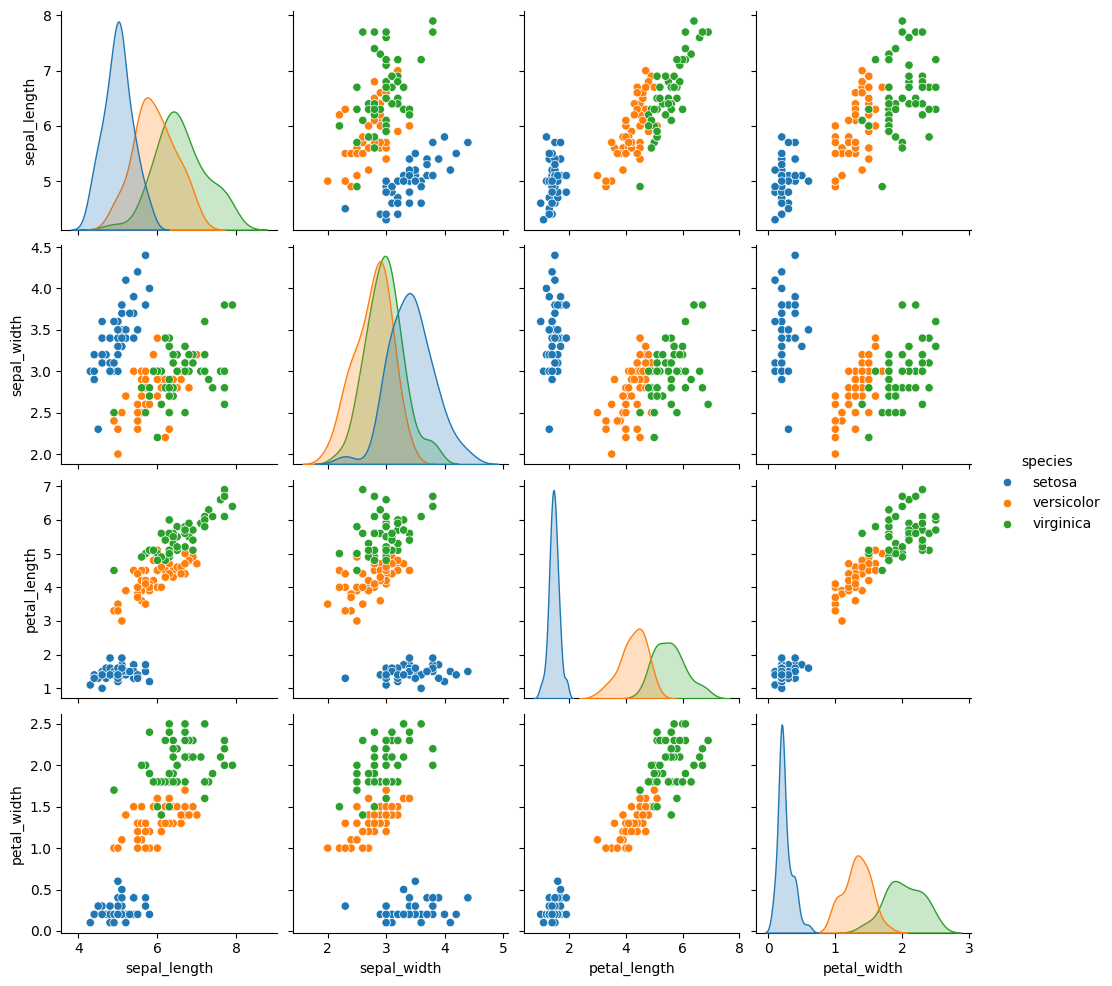

In [6]:
sns.pairplot(df,hue='species');

In [7]:
from scipy.stats import f_oneway
#performing the ANOVA test (analysis of variance)
#Null hypothesis (HO) = there is no correlation between Nominal and continuous variable
#We accept the Assumption(HO) only when P-value > 0.05 else reject

In [8]:
#perform ANOVA on all 4 colums WRT species

In [9]:
#for loop for caluculating p value of multiple column

In [10]:
for i in df.columns[0:4]:
    grp = df.groupby('species')[i]
    print("for column", i , "P- value is",f_oneway(*grp.apply(list))[1])

for column sepal_length P- value is 1.669669190769383e-31
for column sepal_width P- value is 4.49201713330911e-17
for column petal_length P- value is 2.856776610961539e-91
for column petal_width P- value is 4.1694458394430593e-85


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
print(X.shape,y.shape)

(150, 2) (150,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
1-((39/120)**2+(37/120)**2+(44/120)**2)

0.6648611111111111

In [17]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train).score(X_test,y_test)

0.9666666666666667

from sklearn import tree 

In [18]:
from sklearn import tree

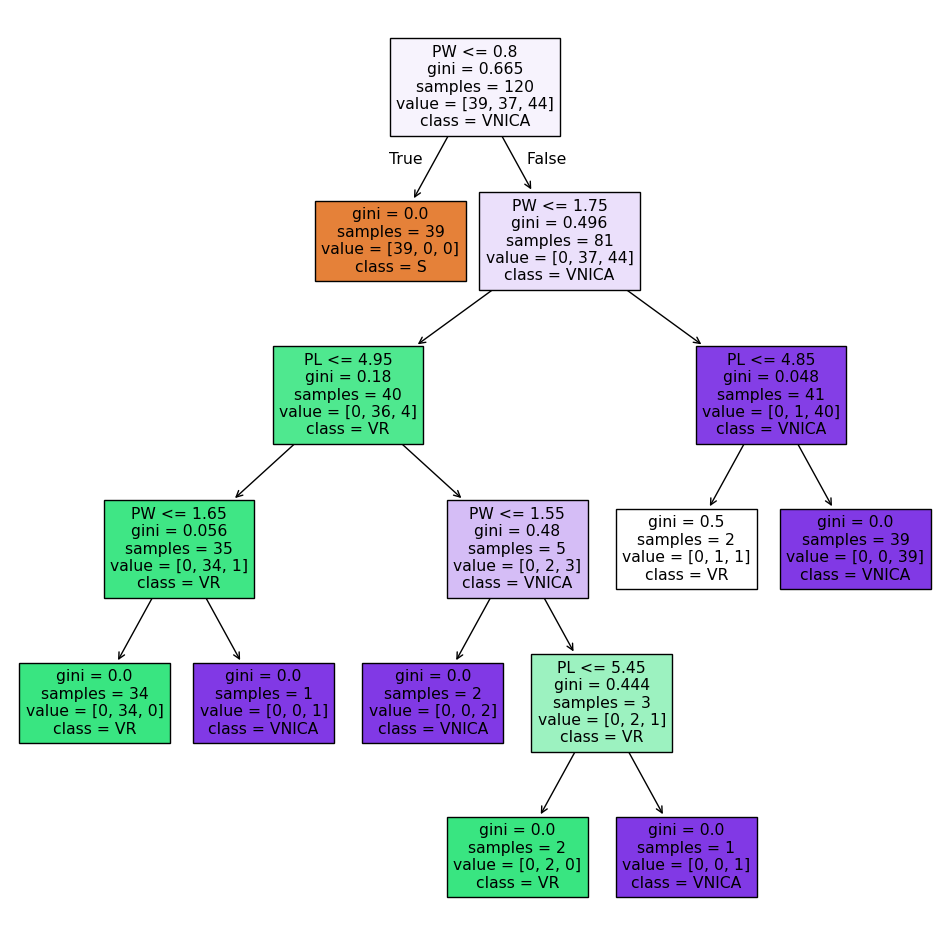

In [19]:
plt.figure(figsize=(12,12))
fn =['PL','PW']
cn =['S','VR','VNICA']
tree.plot_tree(model,filled = True,feature_names = fn, class_names = cn);

In [20]:
1-((1/41)**2+(40/41)**2)

0.04759071980963725

In [21]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train).score(X_test,y_test)

0.9666666666666667

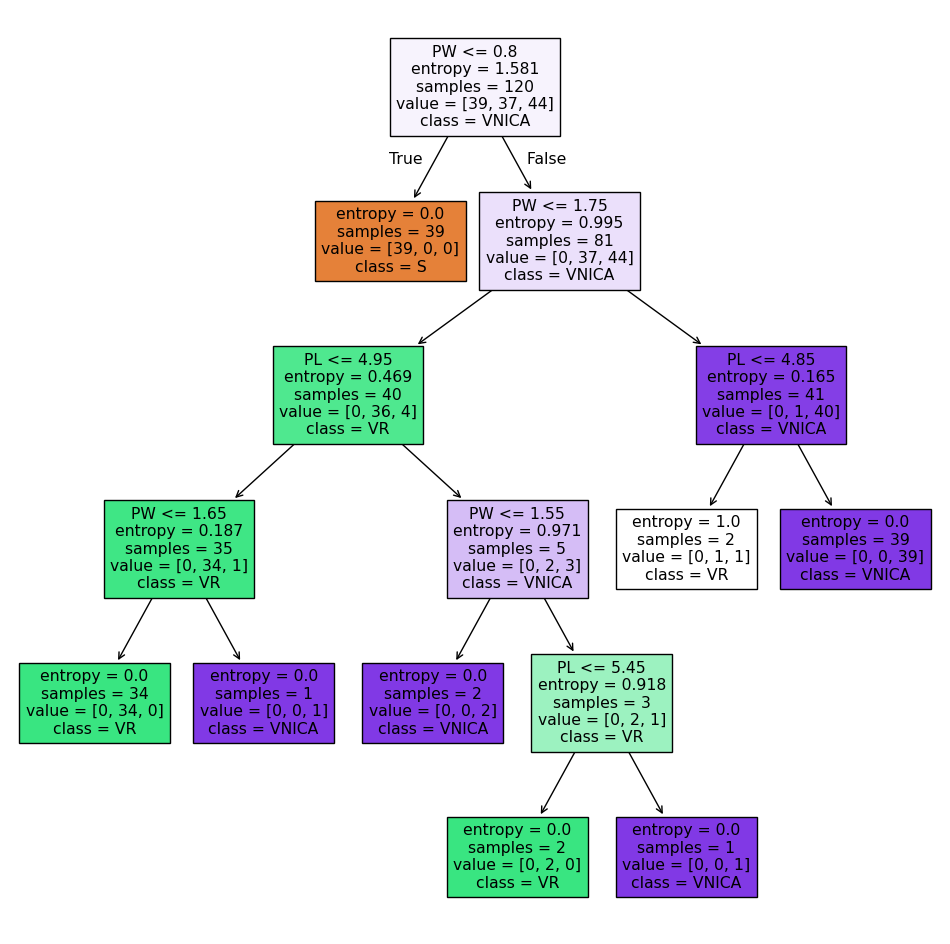

In [22]:
plt.figure(figsize=(12,12))
fn =['PL','PW']
cn =['S','VR','VNICA']
tree.plot_tree(model,filled = True,feature_names = fn, class_names = cn);

In [23]:
-1*((39/20)*np.log2(39/120)+(37/20)*np.log2(37/120)+(34/20)*np.log2(44/120))

8.762841470968505

In [24]:
################Random Forest#######################

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfmodel = RandomForestClassifier(n_estimators = 5)
rfmodel.fit(X_train,y_train).score(X_test,y_test)

0.9333333333333333

In [27]:
rfmodel.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1141170233),
 DecisionTreeClassifier(max_features='sqrt', random_state=127848596),
 DecisionTreeClassifier(max_features='sqrt', random_state=177670291),
 DecisionTreeClassifier(max_features='sqrt', random_state=677910293),
 DecisionTreeClassifier(max_features='sqrt', random_state=142955629)]

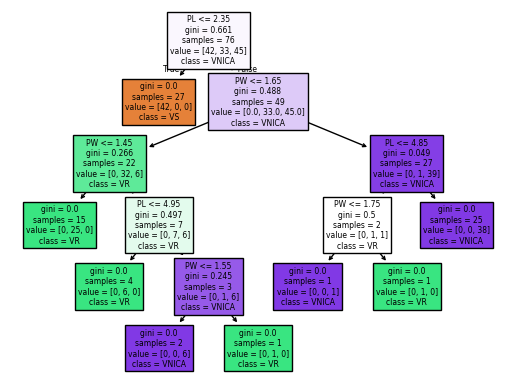

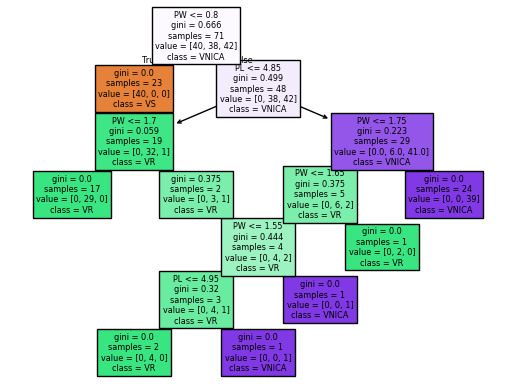

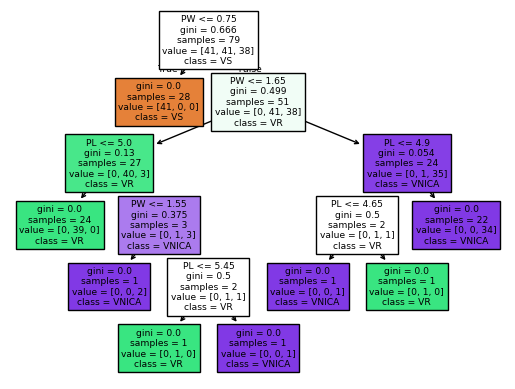

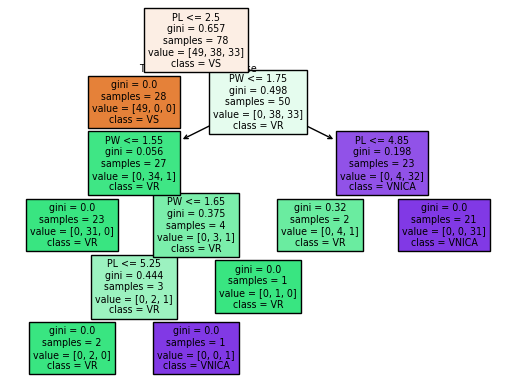

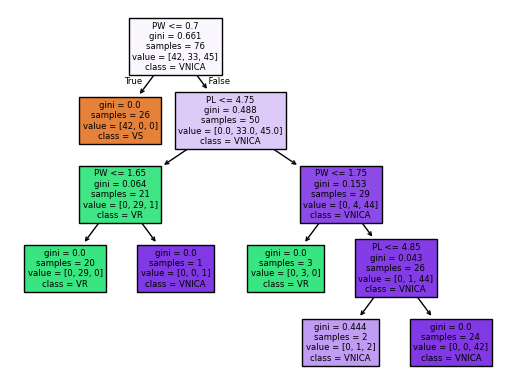

In [28]:
fn =  ['PL','PW']             
cn = ['VS','VR','VNICA']
for i in range(5):
    tree.plot_tree(rfmodel.estimators_[i],filled= True, feature_names = fn , class_names=cn)
    plt.show()

In [29]:
#Hyper parameter tuning


In [33]:
params = {'criterion':['gini','entropy'],
            'n_estimators':[5,10,50,100],
            'max_depth':[2,4,8]}
print(params)

{'criterion': ['gini', 'entropy'], 'n_estimators': [5, 10, 50, 100], 'max_depth': [2, 4, 8]}


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_model=GridSearchCV(rfmodel, params)
grid_model.fit(X_train,y_train)
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}

In [37]:
finalmodel = RandomForestClassifier(n_estimators=50,max_depth=2)
finalmodel.fit(X_train,y_train).score(X_test,y_test)


0.9666666666666667

In [38]:
from sklearn.model_selection import cross_val_score

In [40]:
accuracies= cross_val_score(finalmodel,X_train,y_train,cv=5)
print(accuracies)
print("Average Accuracy =",np.mean(accuracies))

[0.91666667 0.91666667 1.         0.95833333 0.91666667]
Average Accuracy = 0.9416666666666667


In [41]:
accuracies= cross_val_score(finalmodel,X,y,cv=5)
print(accuracies)
print("Average Accuracy =",np.mean(accuracies))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average Accuracy = 0.9666666666666668
